In [4]:
import numpy as np
import pandas as pd

# 設定隨機種子
np.random.seed(42)

# 設定不同區域的郵箱數量權重
# 假設北部佔40%，中部佔20%，南部佔30%，東部佔10%
region_weights = {
    'North': 0.4,   # 北部
    'Central': 0.2, # 中部
    'South': 0.3,   # 南部
    'East': 0.1     # 東部
}

# 根據區域權重分配郵箱數量
num_mailboxes = 2408
mailboxes_per_region = {
    'North': int(num_mailboxes * region_weights['North']),
    'Central': int(num_mailboxes * region_weights['Central']),
    'South': int(num_mailboxes * region_weights['South']),
    'East': num_mailboxes - (int(num_mailboxes * region_weights['North']) +
                             int(num_mailboxes * region_weights['Central']) +
                             int(num_mailboxes * region_weights['South']))
}

# 定義各區域的經緯度範圍
region_lat_lon = {
    'North': {'lat_range': (24.5, 25.3), 'lon_range': (121.3, 121.8)},  # 北部 (如台北、新北)
    'Central': {'lat_range': (23.5, 24.5), 'lon_range': (120.5, 121.3)},  # 中部 (如台中)
    'South': {'lat_range': (22.5, 23.5), 'lon_range': (120, 120.8)},  # 南部 (如高雄)
    'East': {'lat_range': (21.8, 22.5), 'lon_range': (120.5, 121.3)}  # 東部 (如花蓮)
}

# 創建數據存儲
data = {
    'Latitude': [],
    'Longitude': [],
    'Mail Demand': [],
    'Traffic Convenience': [],
    'E-commerce Behavior': [],
    'Future Demand Growth Rate': [],
    'Predicted Future Demand': []
}

# 模擬每個區域的數據
for region, count in mailboxes_per_region.items():
    lat_range = region_lat_lon[region]['lat_range']
    lon_range = region_lat_lon[region]['lon_range']
    
    # 經緯度
    latitude = np.random.uniform(low=lat_range[0], high=lat_range[1], size=count)
    longitude = np.random.uniform(low=lon_range[0], high=lon_range[1], size=count)
    
    # 模擬郵件需求量，根據區域有所差異
    if region == 'North':
        mail_demand = np.random.randint(500, 1500, size=count)  # 北部需求高
    elif region == 'Central':
        mail_demand = np.random.randint(300, 1000, size=count)  # 中部需求中等
    elif region == 'South':
        mail_demand = np.random.randint(400, 1200, size=count)  # 南部需求較高
    else:
        mail_demand = np.random.randint(100, 800, size=count)   # 東部需求較低
    
    # 模擬交通便利性，根據地區情況
    if region == 'North':
        traffic_convenience = np.random.randint(7, 10, size=count)  # 北部交通更便捷
    elif region == 'Central':
        traffic_convenience = np.random.randint(5, 8, size=count)
    elif region == 'South':
        traffic_convenience = np.random.randint(4, 7, size=count)
    else:
        traffic_convenience = np.random.randint(1, 4, size=count)  # 東部交通較不便捷
    
    # 模擬電商消費行為，根據地區消費情況
    if region == 'North':
        e_commerce_behavior = np.random.randint(7, 10, size=count)  # 北部消費行為活躍
    elif region == 'Central':
        e_commerce_behavior = np.random.randint(5, 8, size=count)
    elif region == 'South':
        e_commerce_behavior = np.random.randint(5, 8, size=count)
    else:
        e_commerce_behavior = np.random.randint(2, 5, size=count)  # 東部較少消費
    
    # 模擬未來需求增長率
    future_demand_growth_rate = np.random.uniform(0.02, 0.06, size=count)  # 需求增長率
    
    # 預測未來需求
    predicted_future_demand = mail_demand * (1 + future_demand_growth_rate)
    
    # 添加數據到數據集
    data['Latitude'].extend(latitude)
    data['Longitude'].extend(longitude)
    data['Mail Demand'].extend(mail_demand)
    data['Traffic Convenience'].extend(traffic_convenience)
    data['E-commerce Behavior'].extend(e_commerce_behavior)
    data['Future Demand Growth Rate'].extend(future_demand_growth_rate)
    data['Predicted Future Demand'].extend(predicted_future_demand)

# 創建數據框
df = pd.DataFrame(data)

# 顯示生成的數據表的前幾行
print(df.head())

# 如果需要保存數據到本地 CSV 文件
df.to_csv("optimized_mailbox_data.csv", index=False)


    Latitude   Longitude  Mail Demand  Traffic Convenience  \
0  24.799632  121.494648          618                    9   
1  25.260571  121.444347         1082                    7   
2  25.085595  121.477836         1015                    8   
3  24.978927  121.659523          720                    8   
4  24.624815  121.448561         1025                    7   

   E-commerce Behavior  Future Demand Growth Rate  Predicted Future Demand  
0                    9                   0.057886               653.773831  
1                    8                   0.055394              1141.936529  
2                    8                   0.049563              1065.306119  
3                    7                   0.031099               742.390983  
4                    8                   0.031265              1057.046258  


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 加載數據
df = pd.read_csv('optimized_mailbox_data.csv')

# 查看基本信息
print(df.info())

# 檢查缺失值
print(df.isnull().sum())

# 填補缺失值或刪除缺失值
# 比如使用均值填補缺失值
df.fillna(df.mean(), inplace=True)

# 檢查是否存在異常值（例如過高或過低的郵件量）
print(df.describe())

# 如果發現異常值，可以考慮將其標記或去除
# 假設郵件寄取量超過1500的為異常值，將其過濾掉
df = df[df['Mail Demand'] < 1500]

# 清洗完成後再檢查數據
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2408 entries, 0 to 2407
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Latitude                   2408 non-null   float64
 1   Longitude                  2408 non-null   float64
 2   Mail Demand                2408 non-null   int64  
 3   Traffic Convenience        2408 non-null   int64  
 4   E-commerce Behavior        2408 non-null   int64  
 5   Future Demand Growth Rate  2408 non-null   float64
 6   Predicted Future Demand    2408 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 131.8 KB
None
Latitude                     0
Longitude                    0
Mail Demand                  0
Traffic Convenience          0
E-commerce Behavior          0
Future Demand Growth Rate    0
Predicted Future Demand      0
dtype: int64
          Latitude    Longitude  Mail Demand  Traffic Convenience  \
count  2408.000000  2408.000000  2

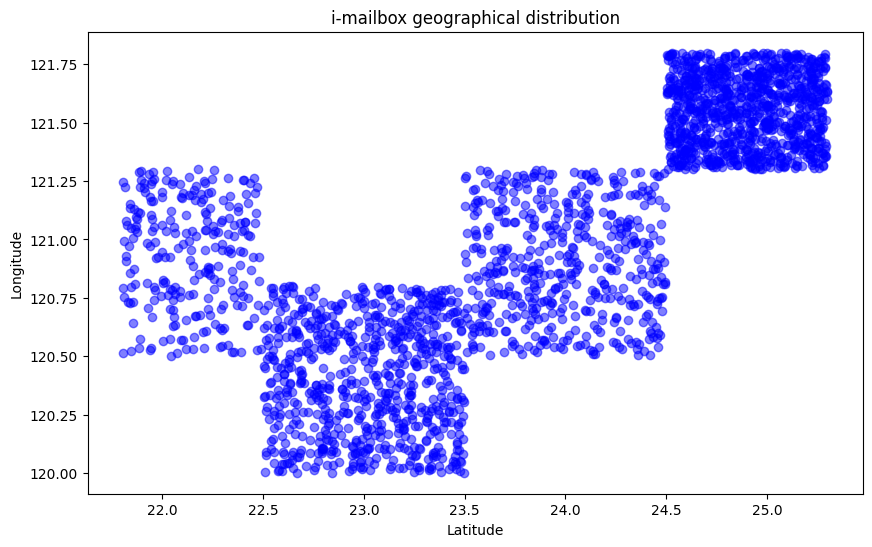

In [9]:
# 可視化 i郵箱的經緯度分佈
plt.figure(figsize=(10, 6))
plt.scatter(df['Latitude'], df['Longitude'], c='blue', alpha=0.5)
plt.title('i-mailbox geographical distribution')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()


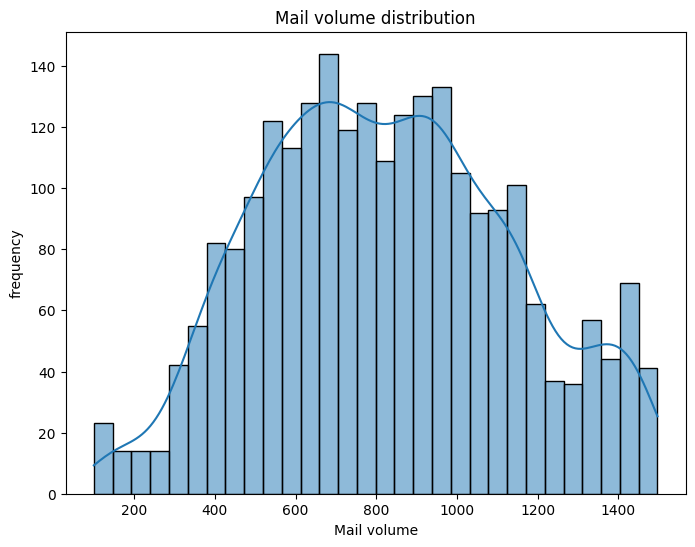

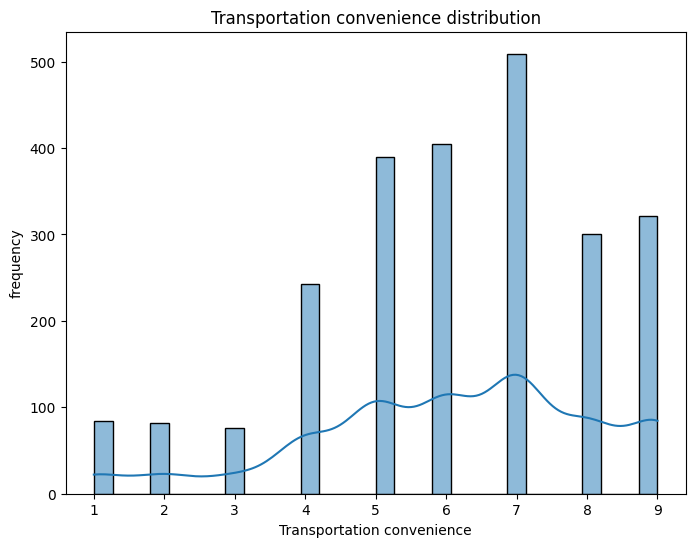

In [11]:
# 郵件量的分佈
plt.figure(figsize=(8, 6))
sns.histplot(df['Mail Demand'], kde=True, bins=30)
plt.title('Mail volume distribution')
plt.xlabel('Mail volume')
plt.ylabel('frequency')
plt.show()

# 交通便利性的分佈
plt.figure(figsize=(8, 6))
sns.histplot(df['Traffic Convenience'], kde=True, bins=30)
plt.title('Transportation convenience distribution')
plt.xlabel('Transportation convenience')
plt.ylabel('frequency')
plt.show()


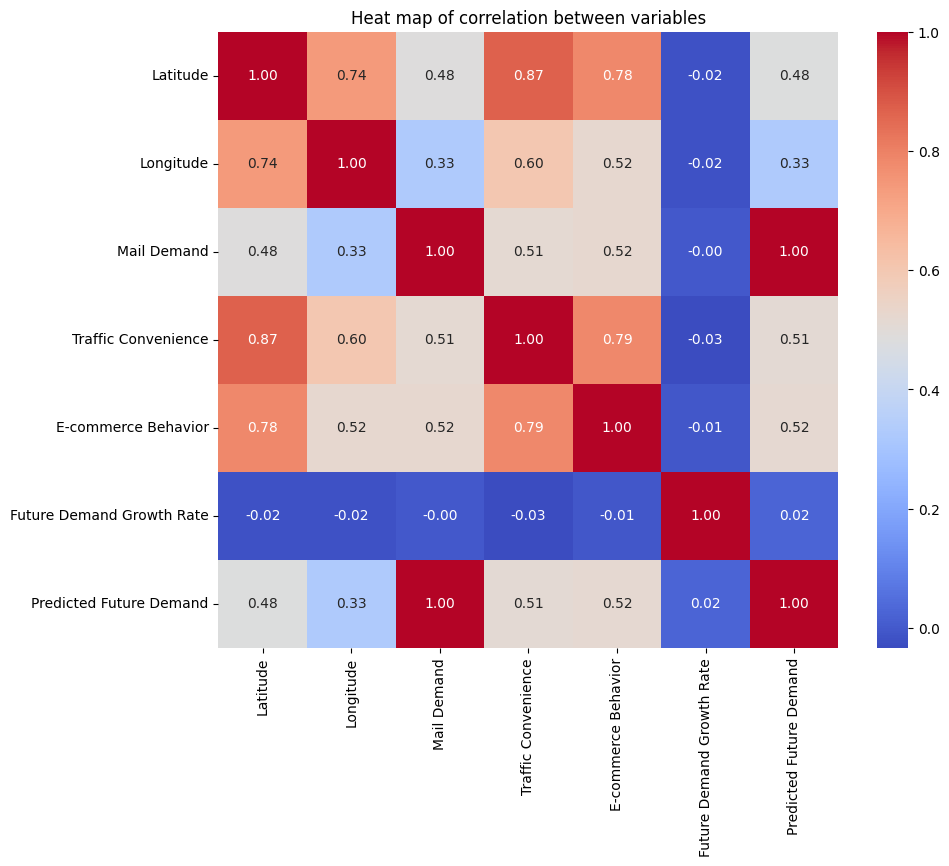

In [12]:
# 計算變量之間的相關性
correlation_matrix = df.corr()

# 畫相關性熱力圖
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heat map of correlation between variables')
plt.show()


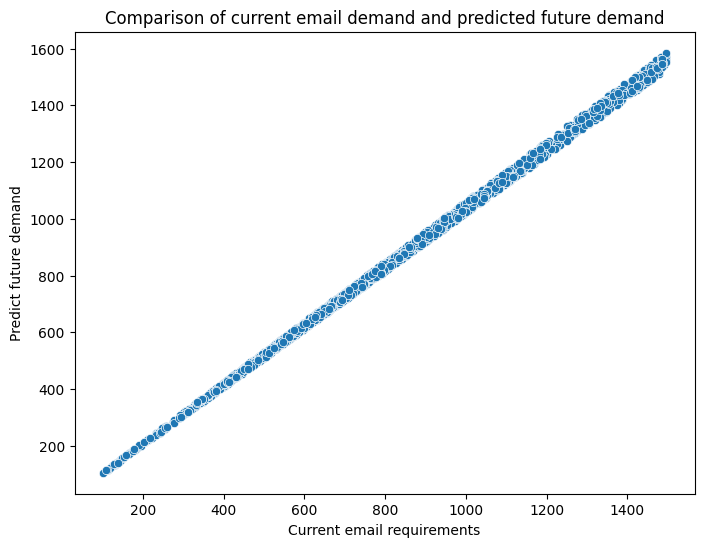

In [13]:
# 畫出當前需求與預測需求的比較
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Mail Demand', y='Predicted Future Demand', data=df)
plt.title('Comparison of current email demand and predicted future demand')
plt.xlabel('Current email requirements')
plt.ylabel('Predict future demand')
plt.show()


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 加載台灣的地理數據（shapefile）
# 請確保你下載的台灣 shapefile 路徑正確
taiwan_map = gpd.read_file('path_to_your_shapefile/taiwan_shapefile.shp')

# 加載你生成的 i郵箱數據
df = pd.read_csv('optimized_mailbox_data.csv')

# 創建一個 GeoDataFrame，將經緯度轉換為 GeoPandas 的點
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# 設置與台灣地圖相同的坐標系統（假設台灣地圖的坐標系統是 EPSG:4326）
gdf.set_crs(epsg=4326, inplace=True)

# 畫出地圖
fig, ax = plt.subplots(figsize=(10, 10))
taiwan_map.plot(ax=ax, color='lightgray')  # 台灣地圖

# 在台灣地圖上繪製 i郵箱的位置分佈
gdf.plot(ax=ax, color='blue', markersize=5, alpha=0.6)
plt.title('Taiwan i-mailbox geographical distribution')
plt.xlabel('longitude')
plt.ylabel('Latitude')
plt.show()


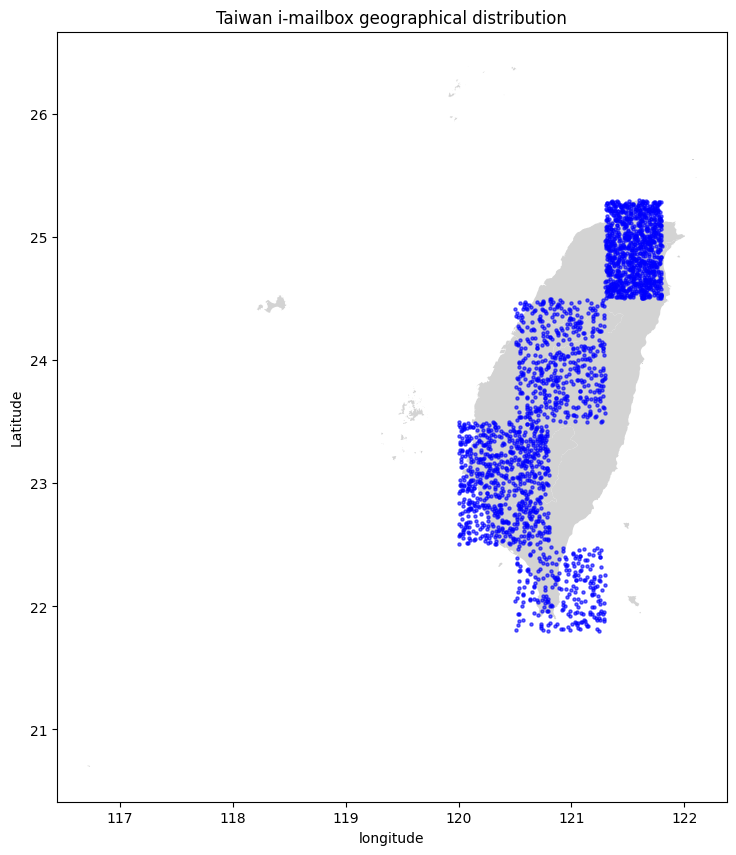

In [38]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 加載台灣的第一層級行政區（縣市）地理數據
taiwan_map = gpd.read_file('gadm41_TWN_shp/gadm41_TWN_1.shp')

# 加載你生成的 i郵箱數據
df = pd.read_csv('optimized_mailbox_data.csv')

# 創建一個 GeoDataFrame，將經緯度轉換為 GeoPandas 的點
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# 設置與台灣地圖相同的坐標系統（假設台灣地圖的坐標系統是 EPSG:4326）
gdf.set_crs(epsg=4326, inplace=True)

# 畫出地圖
fig, ax = plt.subplots(figsize=(10, 10))
taiwan_map.plot(ax=ax, color='lightgray')  # 畫出台灣的縣市邊界地圖

# 在台灣地圖上繪製 i郵箱的位置分佈
gdf.plot(ax=ax, color='blue', markersize=5, alpha=0.6)
plt.title('Taiwan i-mailbox geographical distribution')
plt.xlabel('longitude')
plt.ylabel('Latitude')
plt.show()

ValueError: aspect must be finite and positive 

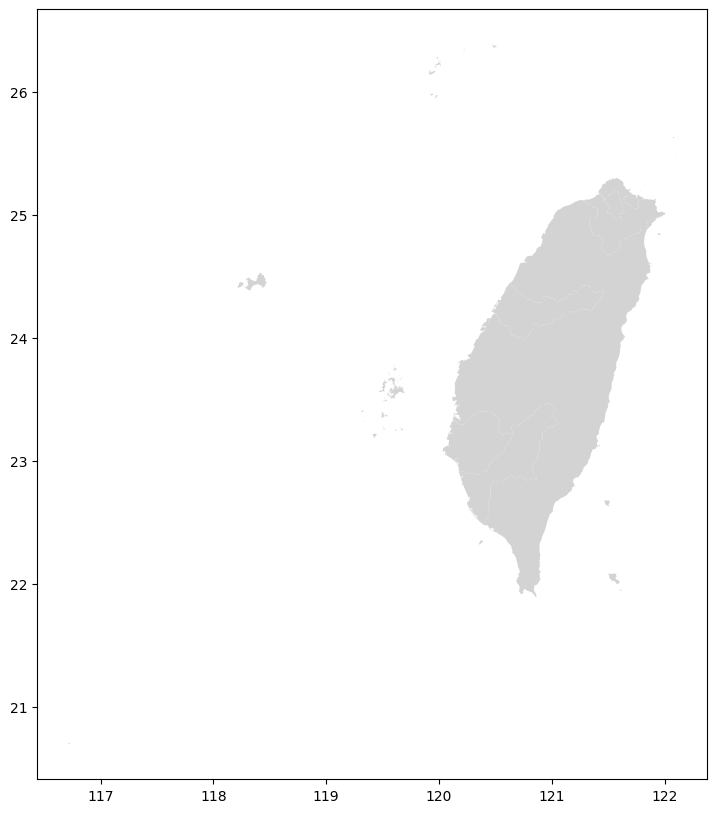

In [37]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 加載台灣的第一層級行政區（縣市）地理數據
taiwan_map = gpd.read_file('gadm41_TWN_shp/gadm41_TWN_1.shp')

# 加載你生成的 i郵箱數據
df = pd.read_csv('TEST.csv')

# 創建一個 GeoDataFrame，將經緯度轉換為 GeoPandas 的點
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# 設置與台灣地圖相同的坐標系統（假設台灣地圖的坐標系統是 EPSG:4326）
gdf.set_crs(epsg=4326, inplace=True)

# 畫出地圖
fig, ax = plt.subplots(figsize=(10, 10))
taiwan_map.plot(ax=ax, color='lightgray')  # 畫出台灣的縣市邊界地圖

# 在台灣地圖上繪製 i郵箱的位置分佈
gdf.plot(ax=ax, color='blue', markersize=5, alpha=0.6)
plt.title('Taiwan i-mailbox geographical distribution')
plt.xlabel('longitude')
plt.ylabel('Latitude')
plt.show()

In [39]:
import pandas as pd
import folium

# Load the CSV file
file_path = 'Ibox_All.csv'
data = pd.read_csv(file_path)

# Create a base map centered on Taiwan
map_center = [23.6978, 120.9605]  # Latitude and Longitude of Taiwan's center
map_taiwan_points = folium.Map(location=map_center, zoom_start=7)

# Add a marker for each point in the dataset
for index, row in data.iterrows():
    folium.CircleMarker(
        location=[row['座標y'], row['座標x']],
        radius=3,  # Smaller size for more detailed points
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(map_taiwan_points)

# Save the point distribution map as an HTML file
map_points_path = "taiwan_point_distribution_map.html"
map_taiwan_points.save(map_points_path)

# Provide the link to the map
print(map_points_path)


taiwan_point_distribution_map.html


In [19]:
import geopandas as gpd
import folium

# 讀取台灣地圖數據
gdf = gpd.read_file('new/COUNTY_MOI_1130718.shp')

# 初始化地圖，設定中心點和縮放級別
m = folium.Map(location=[23.5, 121], zoom_start=7)

# 添加地圖圖層
folium.GeoJson(gdf).add_to(m)

# 保存地圖為 HTML 文件
m.save('taiwan_map.html')


In [21]:
# 確保這裡引用的是 df 而不是 data
for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=str(row['Mail Demand'])).add_to(m)


In [22]:
# Let me load and inspect the content of the file Ibox_All.csv to understand its structure
import pandas as pd

# Load the dataset
file_path = 'Ibox_All.csv'
ibox_data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
ibox_data.head()


,名稱,郵遞區號,地址,相對位置,營業時間,座標x,座標y,儲格數,櫃型,備註,付費方式
0,臺北開封街ｉ郵箱,10000,臺北市中正區開封街1段45號,開封街自助郵局內,24小時,121.512421,25.046130,180,三代櫃,(智慧郵筒),郵政金融卡/悠遊卡/一卡通/愛金卡
1,臺北南陽郵局ｉ郵箱,10000,臺北市中正區信陽街8號,南陽街與信陽街轉角騎樓下,24小時,121.515870,25.044520,80,三代櫃,(智慧郵筒),郵政金融卡/悠遊卡/一卡通/愛金卡
2,臺北東門郵局ｉ郵箱,10000,臺北市中正區信義路2段163號,ATM自助服務區,24小時,121.528921,25.034074,40,三代櫃,(智慧郵筒),郵政金融卡/悠遊卡/一卡通/愛金卡
3,臺北大安郵局ｉ郵箱,10600,臺北市大安區信義路3段89號,自助服務區,24小時,121.538299,25.033747,33,三代櫃,(智慧郵筒),郵政金融卡/悠遊卡/一卡通/愛金卡
4,臺北青田郵局ｉ郵箱,10600,臺北市大安區和平東路1段155號,ATM自助服務區內,24小時,121.531140,25.026659,73,三代櫃,(智慧郵筒),郵政金融卡/悠遊卡/一卡通/愛金卡


In [25]:
# Display the column names in the dataset
print(ibox_data.columns)


Index(['名稱', '郵遞區號', '地址', '相對位置', '營業時間', '座標x', '座標y', '儲格數', '櫃型', '備註',
       '付費方式'],
      dtype='object')


In [27]:
import folium
from folium.plugins import MarkerCluster

# Create a map centered on Taiwan
taiwan_map = folium.Map(location=[23.6978, 120.9605], zoom_start=7)

# Add marker cluster for better visualization when there are many points
marker_cluster = MarkerCluster().add_to(taiwan_map)

# Add iPostbox locations to the map
for index, row in ibox_data.iterrows():
 folium.Marker(
 location=[row['座標y'], row['座標x']],
 popup=row['名稱']
 ).add_to(marker_cluster)

# Save the map to an HTML file and display the map
map_file_path = "taiwan_ipostbox_map.html"
taiwan_map.save(map_file_path)

map_file_path # Return the path to the saved map file


'taiwan_ipostbox_map.html'

In [29]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load the dataset
file_path = 'Ibox_All.csv'
ibox_data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print(ibox_data.columns)

# Assuming the latitude and longitude columns are named 'Latitude' and 'Longitude'
# If they are named differently, replace 'Latitude' and 'Longitude' with the actual column names
latitude_column = '座標x'  # Replace with actual latitude column name
longitude_column = '座標y'  # Replace with actual longitude column name

# Create a base map centered on Taiwan
taiwan_map = folium.Map(location=[23.6978, 120.9605], zoom_start=7)

# Prepare the data for the heatmap (list of [latitude, longitude] points)
heat_data = [[row[latitude_column], row[longitude_column]] for index, row in ibox_data.iterrows()]

# Add a heatmap layer to the map
HeatMap(heat_data).add_to(taiwan_map)

# Save the map to an HTML file
map_file_path = "taiwan_ipostbox_heatmap.html"
taiwan_map.save(map_file_path)

# Display the path to the saved file
print(f"Map saved to: {map_file_path}")


Index(['名稱', '郵遞區號', '地址', '相對位置', '營業時間', '座標x', '座標y', '儲格數', '櫃型', '備註',
       '付費方式'],
      dtype='object')
Map saved to: taiwan_ipostbox_heatmap.html


In [35]:
# Let's load the new CSV file (EN_Ibox_All.csv) and inspect its contents to understand its structure
import pandas as pd

# Load the dataset
file_path = 'EN_Ibox_All.csv'
ibox_data_en = pd.read_csv(file_path)

# Display the first few rows to understand its structure
ibox_data_en.head(), ibox_data_en.columns


(          名稱   郵遞區號                地址          相對位置  營業時間   Longitude  \
 0   臺北開封街ｉ郵箱  10000    臺北市中正區開封街1段45號      開封街自助郵局內  24小時  121.512421   
 1  臺北南陽郵局ｉ郵箱  10000       臺北市中正區信陽街8號  南陽街與信陽街轉角騎樓下  24小時  121.515870   
 2  臺北東門郵局ｉ郵箱  10000   臺北市中正區信義路2段163號      ATM自助服務區  24小時  121.528921   
 3  臺北大安郵局ｉ郵箱  10600    臺北市大安區信義路3段89號         自助服務區  24小時  121.538299   
 4  臺北青田郵局ｉ郵箱  10600  臺北市大安區和平東路1段155號     ATM自助服務區內  24小時  121.531140   
 
     Latitude  儲格數   櫃型      備註               付費方式  
 0  25.046130  180  三代櫃  (智慧郵筒)  郵政金融卡/悠遊卡/一卡通/愛金卡  
 1  25.044520   80  三代櫃  (智慧郵筒)  郵政金融卡/悠遊卡/一卡通/愛金卡  
 2  25.034074   40  三代櫃  (智慧郵筒)  郵政金融卡/悠遊卡/一卡通/愛金卡  
 3  25.033747   33  三代櫃  (智慧郵筒)  郵政金融卡/悠遊卡/一卡通/愛金卡  
 4  25.026659   73  三代櫃  (智慧郵筒)  郵政金融卡/悠遊卡/一卡通/愛金卡  ,
 Index(['名稱', '郵遞區號', '地址', '相對位置', '營業時間', 'Longitude', 'Latitude', '儲格數',
        '櫃型', '備註', '付費方式'],
       dtype='object'))

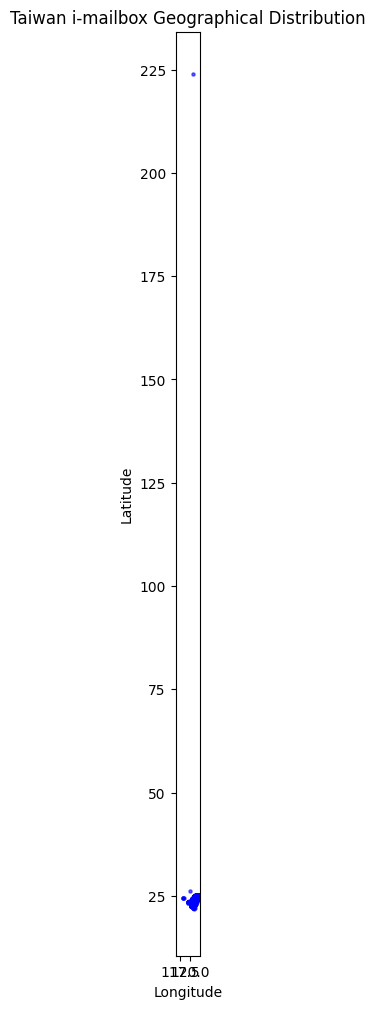

In [36]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile for Taiwan (gadm41_TWN_0.shp)
taiwan_map = gpd.read_file('gadm41_TWN_shp/gadm41_TWN_0.shp')

# Create a GeoDataFrame for the iPostbox data using Longitude and Latitude
ibox_gdf = gpd.GeoDataFrame(
    ibox_data_en, 
    geometry=gpd.points_from_xy(ibox_data_en.Longitude, ibox_data_en.Latitude)
)

# Plot the base Taiwan map
fig, ax = plt.subplots(figsize=(10, 12))
taiwan_map.plot(ax=ax, color='lightgray')  # Draw Taiwan's administrative boundaries

# Plot i-mailbox locations on top of the Taiwan map
ibox_gdf.plot(ax=ax, color='blue', markersize=5, alpha=0.6)

# Set the title and labels
plt.title('Taiwan i-mailbox Geographical Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()


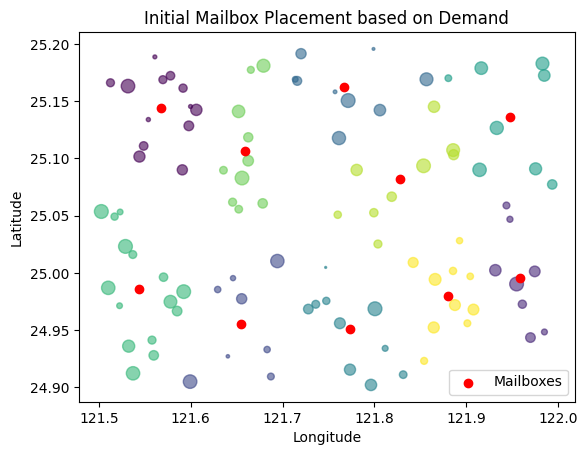

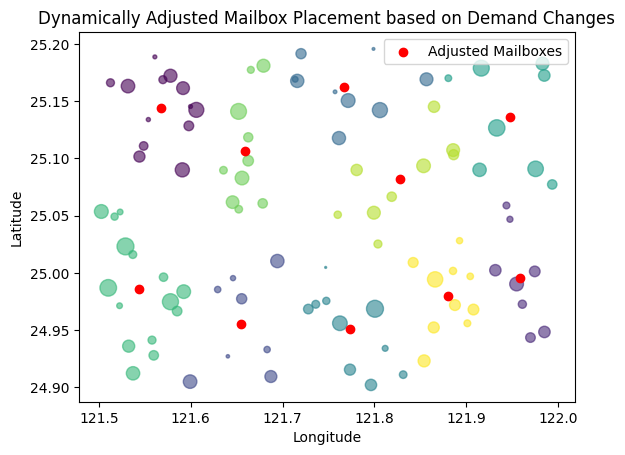

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 生成模擬郵件需求數據點
np.random.seed(42)
n_points = 100  # 模擬100個郵件需求點
x = np.random.uniform(121.5, 122.0, n_points)  # 模擬台北的經度範圍
y = np.random.uniform(24.9, 25.2, n_points)   # 模擬台北的緯度範圍
demand = np.random.randint(1, 100, n_points)  # 模擬不同地區的郵件需求

# 將需求點和郵件需求數據組合
data = pd.DataFrame({'Longitude': x, 'Latitude': y, 'Demand': demand})

# 設置初始i郵箱布點數量
n_mailboxes = 10  # 模擬10個初始i郵箱布點

# 初始化KMeans
kmeans = KMeans(n_clusters=n_mailboxes, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Longitude', 'Latitude']])

# 繪製初始布點的可視化
plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'], cmap='viridis', s=data['Demand'], alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', label='Mailboxes')
plt.title('Initial Mailbox Placement based on Demand')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# 動態調整布點：模擬需求的變化
# 假設某些地區需求上升
data.loc[0:20, 'Demand'] += 50  # 模擬前20個點的需求增加

# 重新計算KMeans，基於新的需求進行布點調整
kmeans = KMeans(n_clusters=n_mailboxes, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Longitude', 'Latitude']])

# 繪製動態調整後的布點可視化
plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'], cmap='viridis', s=data['Demand'], alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', label='Adjusted Mailboxes')
plt.title('Dynamically Adjusted Mailbox Placement based on Demand Changes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [43]:
import numpy as np
import pandas as pd
import folium
from sklearn.cluster import KMeans

# 生成模擬郵件需求數據點
np.random.seed(42)
n_points = 100  # 模擬100個郵件需求點
x = np.random.uniform(120.5, 121.5, n_points)  # 模擬台灣的經度範圍
y = np.random.uniform(23.5, 25.5, n_points)   # 模擬台灣的緯度範圍
demand = np.random.randint(1, 100, n_points)  # 模擬不同地區的郵件需求

# 將需求點和郵件需求數據組合
data = pd.DataFrame({'Longitude': x, 'Latitude': y, 'Demand': demand})

# 設置初始i郵箱布點數量
n_mailboxes = 10  # 模擬10個初始i郵箱布點

# 初始化KMeans，根據需求點進行初始布點
kmeans = KMeans(n_clusters=n_mailboxes, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Longitude', 'Latitude']])

# 創建台灣地圖
map_taiwan = folium.Map(location=[23.7, 121], zoom_start=8)

# 繪製需求點（郵件需求點）
for index, row in data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Demand'] / 10,  # 用需求數據控制點的大小
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(map_taiwan)

# 繪製初始i郵箱布點
for center in kmeans.cluster_centers_:
    folium.Marker(location=[center[1], center[0]], popup="Mailbox", icon=folium.Icon(color='red')).add_to(map_taiwan)

# 保存初始布點地圖
initial_map_path = "taiwan_initial_mailbox_placement.html"
map_taiwan.save(initial_map_path)

# 動態調整布點：模擬需求的變化
# 假設某些地區需求上升
data.loc[0:20, 'Demand'] += 50  # 模擬前20個點的需求增加

# 重新計算KMeans，基於新的需求進行布點調整
kmeans = KMeans(n_clusters=n_mailboxes, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Longitude', 'Latitude']])

# 創建新的台灣地圖
map_taiwan_adjusted = folium.Map(location=[23.7, 121], zoom_start=8)

# 繪製調整後的需求點
for index, row in data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Demand'] / 10,
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(map_taiwan_adjusted)

# 繪製動態調整後的i郵箱布點
for center in kmeans.cluster_centers_:
    folium.Marker(location=[center[1], center[0]], popup="Adjusted Mailbox", icon=folium.Icon(color='green')).add_to(map_taiwan_adjusted)

# 保存動態調整布點地圖
adjusted_map_path = "taiwan_adjusted_mailbox_placement.html"
map_taiwan_adjusted.save(adjusted_map_path)

# 返回生成的地圖文件路徑
initial_map_path, adjusted_map_path


('taiwan_initial_mailbox_placement.html',
 'taiwan_adjusted_mailbox_placement.html')